<a href="https://colab.research.google.com/github/Anjinhyoung/TIL-Today-I-Learned-/blob/main/05_%EC%87%BC%ED%95%91%EB%AC%BC_%EA%B3%A0%EA%B0%9D%EC%A3%BC%EB%AC%B8_%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 고객 주문 데이터 파악하기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1-1 데이터 셋
* 가상 온라인 리테일 사이트의 2010/12 ~ 2011/12까지의 주문 기록 데이터
* 약 500,000건의 데이터

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
retail = pd.read_csv('/content/drive/MyDrive/3개월차 ai프로젝트 연습/OnlineRetail.csv')

In [ ]:
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


# 데이터 살펴보기

In [ ]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


InvoiceNo:주문번호
StockCode:아이템 아이디                 
Description:상품 설명
Quantity:주문 수량
InvoiceDate:주문 시간
UnitPrice:상품 가격
CustomerID:고객 아이디
Country:고객 거주 지역(국가)


In [ ]:
# 각 필드당 null이 몇 개 있는지 확인
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# 각 필드당 null이 몇% 있는지 확인
retail.isnull().mean()

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64

In [ ]:
len(retail)

541909

In [ ]:
# retail = retail[retail.CustomerID.notnull()] = ( retail = retail[pd.notnull(retail.CustomerID)]  )

In [ ]:
# 비회원을 제거
retail = retail[pd.notnull(retail.CustomerID)] # 원본 DataFrame을 수정하지 않고 새로운 DataFrame을 반환

In [ ]:
len(retail)

406829

In [ ]:
# 구입 수량이 1이상인 데이터만 저장
retail = retail[retail.Quantity > 0]  # 원본 DataFrame을 수정하지 않고 새로운 DataFrame을 반환

In [ ]:
# retail.Quantity = retail.Quantity > 0  직접 데이터 DataFrame을 수정

In [ ]:
# 구입 가격이 1이상 데이터만 저장
retail = retail[retail.UnitPrice > 0]

In [ ]:
len(retail)

397884

In [ ]:
# 고객의 총 지출비용(CheckoutPrice) 구하기
# 수량 * 가격은 총 지출 비용
retail['CheckoutPrice'] = retail.UnitPrice * retail.Quantity
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [ ]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   InvoiceNo      397884 non-null  object 
 1   StockCode      397884 non-null  object 
 2   Description    397884 non-null  object 
 3   Quantity       397884 non-null  int64  
 4   InvoiceDate    397884 non-null  object 
 5   UnitPrice      397884 non-null  float64
 6   CustomerID     397884 non-null  float64
 7   Country        397884 non-null  object 
 8   CheckoutPrice  397884 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 30.4+ MB


### 날짜 타입 데이터 변환
* 문자열로 데이터를 사용하는 것보다 datetime 타입으로 사용하는 것이 날짜 분석 및 계산에 용이

In [ ]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [ ]:
retail.InvoiceDate = pd.to_datetime(retail.InvoiceDate)

In [ ]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      397884 non-null  object        
 1   StockCode      397884 non-null  object        
 2   Description    397884 non-null  object        
 3   Quantity       397884 non-null  int64         
 4   InvoiceDate    397884 non-null  datetime64[ns]
 5   UnitPrice      397884 non-null  float64       
 6   CustomerID     397884 non-null  float64       
 7   Country        397884 non-null  object        
 8   CheckoutPrice  397884 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


In [ ]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### 매출 구하기

In [ ]:
# 전체 매출
total_revenue  =  retail.CheckoutPrice.sum()
total_revenue

8911407.904

In [ ]:
# rev_by_countries2 = retail.groupby('Country').sum().CheckoutPrice.sort_values() 아래 코드랑 같
# rev_by_countries2

In [ ]:
# 국가별 매출

# rev_by_countries = retail.groupby('Country').sum()['CheckoutPrice'].sort_values()   # 선생님 코드

rev_by_countries = retail.groupby('Country').sum().CheckoutPrice.sort_values()

# rev_by_countries = retail.groupby('Country').sum().CheckoutPrice.sort_values() = rev_by_countries = retail.groupby('Country').sum()['CheckoutPrice'].sort_values()

# rev_by_countries = retail.groupby('Country').sum().CheckoutPrice.sort_values()

rev_by_countries

<ipython-input-24-15ff83c46e08>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rev_by_countries = retail.groupby('Country').sum().CheckoutPrice.sort_values()


Country
Saudi Arabia                145.920
Bahrain                     548.400
Czech Republic              826.740
RSA                        1002.310
Brazil                     1143.600
European Community         1300.250
Lithuania                  1661.060
Lebanon                    1693.880
United Arab Emirates       1902.280
Unspecified                2667.070
Malta                      2725.590
USA                        3580.390
Canada                     3666.380
Iceland                    4310.000
Greece                     4760.520
Israel                     7221.690
Poland                     7334.650
Austria                   10198.680
Cyprus                    13590.380
Italy                     17483.240
Denmark                   18955.340
Channel Islands           20450.440
Singapore                 21279.290
Finland                   22546.080
Portugal                  33439.890
Norway                    36165.440
Japan                     37416.370
Sweden              

[Text(0, 0, 'Saudi Arabia'),
 Text(1, 0, 'Bahrain'),
 Text(2, 0, 'Czech Republic'),
 Text(3, 0, 'RSA'),
 Text(4, 0, 'Brazil'),
 Text(5, 0, 'European Community'),
 Text(6, 0, 'Lithuania'),
 Text(7, 0, 'Lebanon'),
 Text(8, 0, 'United Arab Emirates'),
 Text(9, 0, 'Unspecified'),
 Text(10, 0, 'Malta'),
 Text(11, 0, 'USA'),
 Text(12, 0, 'Canada'),
 Text(13, 0, 'Iceland'),
 Text(14, 0, 'Greece'),
 Text(15, 0, 'Israel'),
 Text(16, 0, 'Poland'),
 Text(17, 0, 'Austria'),
 Text(18, 0, 'Cyprus'),
 Text(19, 0, 'Italy'),
 Text(20, 0, 'Denmark'),
 Text(21, 0, 'Channel Islands'),
 Text(22, 0, 'Singapore'),
 Text(23, 0, 'Finland'),
 Text(24, 0, 'Portugal'),
 Text(25, 0, 'Norway'),
 Text(26, 0, 'Japan'),
 Text(27, 0, 'Sweden'),
 Text(28, 0, 'Belgium'),
 Text(29, 0, 'Switzerland'),
 Text(30, 0, 'Spain'),
 Text(31, 0, 'Australia'),
 Text(32, 0, 'France'),
 Text(33, 0, 'Germany'),
 Text(34, 0, 'EIRE'),
 Text(35, 0, 'Netherlands'),
 Text(36, 0, 'United Kingdom')]

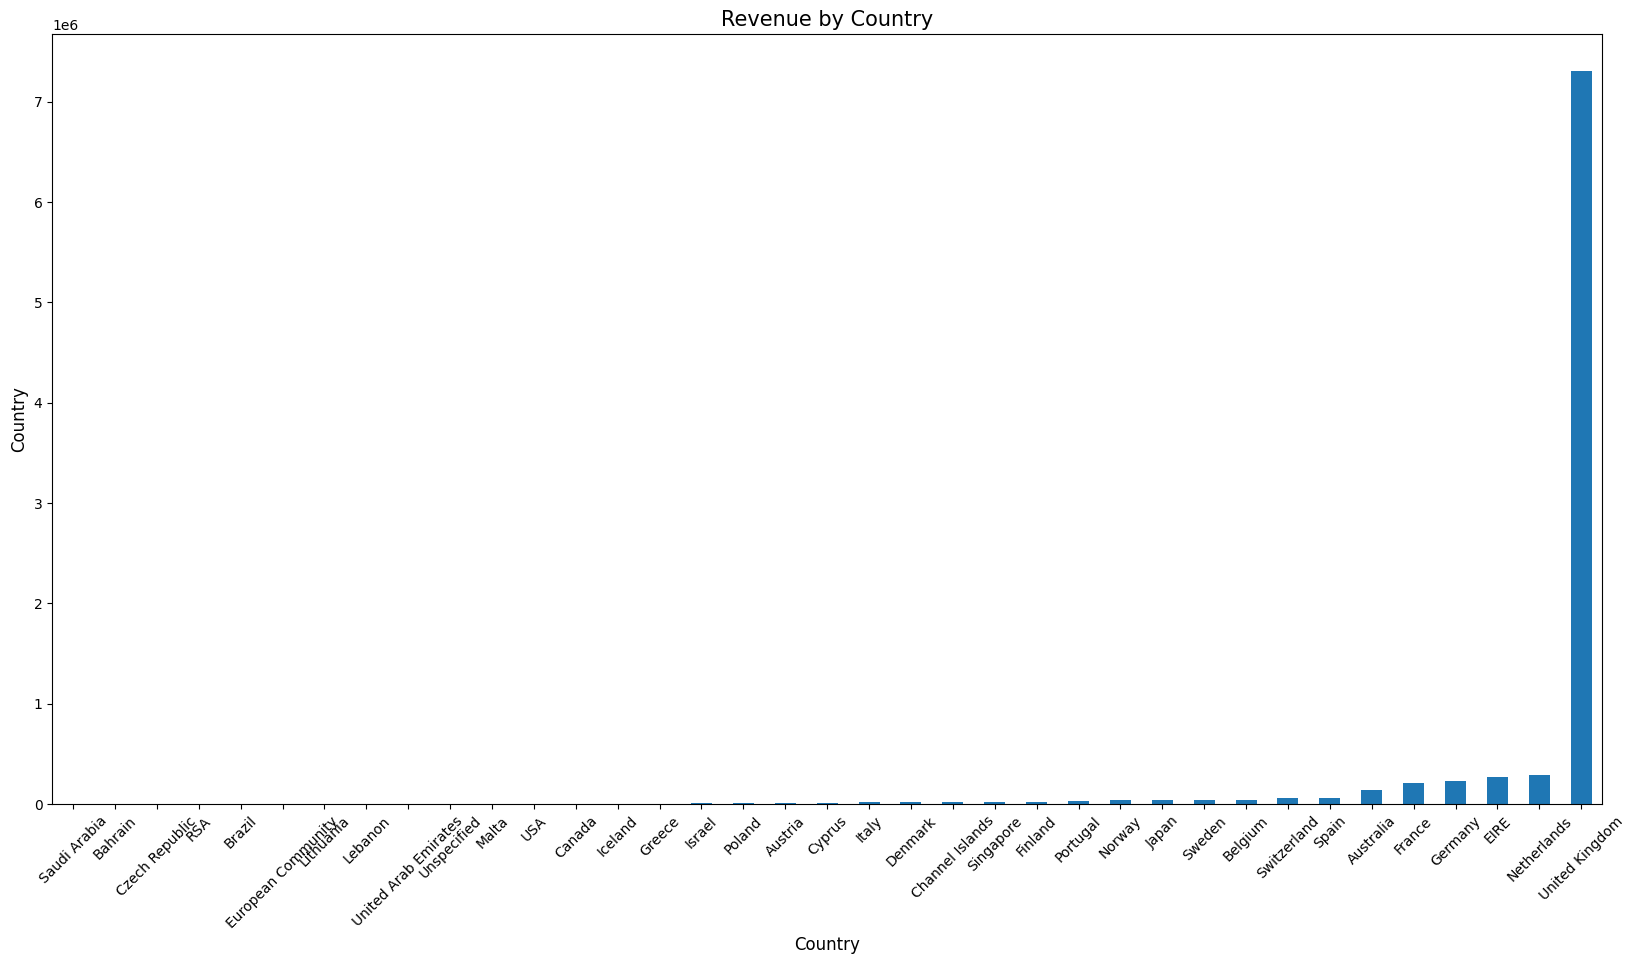

In [ ]:
plot = rev_by_countries.plot(kind = 'bar', figsize=(20,10)) #pandas에도 matplotlib 사용할 수 있음 간단하게 할 거면 pandas matplotlib사용할 수 있음
plot.set_xlabel('Country',fontsize=12)
plot.set_ylabel('Country',fontsize=12)
plot.set_title('Revenue by Country',fontsize=15)
plot.set_xticklabels(labels = rev_by_countries.index, rotation=45)

In [ ]:
rev_by_countries / total_revenue

Country
Saudi Arabia            0.000016
Bahrain                 0.000062
Czech Republic          0.000093
RSA                     0.000112
Brazil                  0.000128
European Community      0.000146
Lithuania               0.000186
Lebanon                 0.000190
United Arab Emirates    0.000213
Unspecified             0.000299
Malta                   0.000306
USA                     0.000402
Canada                  0.000411
Iceland                 0.000484
Greece                  0.000534
Israel                  0.000810
Poland                  0.000823
Austria                 0.001144
Cyprus                  0.001525
Italy                   0.001962
Denmark                 0.002127
Channel Islands         0.002295
Singapore               0.002388
Finland                 0.002530
Portugal                0.003752
Norway                  0.004058
Japan                   0.004199
Sweden                  0.004307
Belgium                 0.004623
Switzerland             0.006334
Sp

In [ ]:
retail.sort_values('InvoiceDate',ascending=False) # 둘이 같은 코드입니다.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France,15.60
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France,19.80
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France,19.80
541897,581587,22728,ALARM CLOCK BAKELIKE PINK,4,2011-12-09 12:50:00,3.75,12680.0,France,15.00
...,...,...,...,...,...,...,...,...,...
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50


In [ ]:
# 월별 매출 구하기
retail.InvoiceDate.sort_values(ascending=False)

541908   2011-12-09 12:50:00
541901   2011-12-09 12:50:00
541895   2011-12-09 12:50:00
541896   2011-12-09 12:50:00
541897   2011-12-09 12:50:00
                 ...        
3        2010-12-01 08:26:00
1        2010-12-01 08:26:00
5        2010-12-01 08:26:00
6        2010-12-01 08:26:00
0        2010-12-01 08:26:00
Name: InvoiceDate, Length: 397884, dtype: datetime64[ns]

In [ ]:
def extract_month(date):
    month = str(date.month)
    if date.month < 10:
        month = '0'+ month
    return str(date.year) + month


In [ ]:
# rev_by_month = retail.InvoiceDate.sort_values().groupby(extract_month).sum()['CheckoutPrice'] 이 코드는 작동이 안됨

AttributeError: ignored

In [ ]:
rev_by_month = retail.set_index('InvoiceDate').groupby(extract_month).sum()['CheckoutPrice']  # groupby()가 apply 대신

#  rev_by_month = retail.set_index('InvoiceDate').groupby(extract_month).sum().checkoutPrice

#  위랑 아래는 같은 코

rev_by_month

<ipython-input-30-06fdbe278ff4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rev_by_month = retail.set_index('InvoiceDate').groupby(extract_month).sum()['CheckoutPrice']  # groupby()가 apply 대신


InvoiceDate
201012     572713.890
201101     569445.040
201102     447137.350
201103     595500.760
201104     469200.361
201105     678594.560
201106     661213.690
201107     600091.011
201108     645343.900
201109     952838.382
201110    1039318.790
201111    1161817.380
201112     518192.790
Name: CheckoutPrice, dtype: float64

In [ ]:
def plot_bar(df, xlabel,ylabel,title,titlesize=15,fontsize=12, rotation=45, figsize=(20,10)):
    plot = df.plot(kind = 'bar', figsize=figsize) #pandas에도 matplotlib 사용할 수 있음 간단하게 할 거면 pandas matplotlib사용할 수 있음
    plot.set_xlabel(xlabel,fontsize=fontsize)
    plot.set_ylabel(ylabel,fontsize=fontsize)
    plot.set_title(title,fontsize=titlesize)
    plot.set_xticklabels(labels = df.index, rotation=rotation)

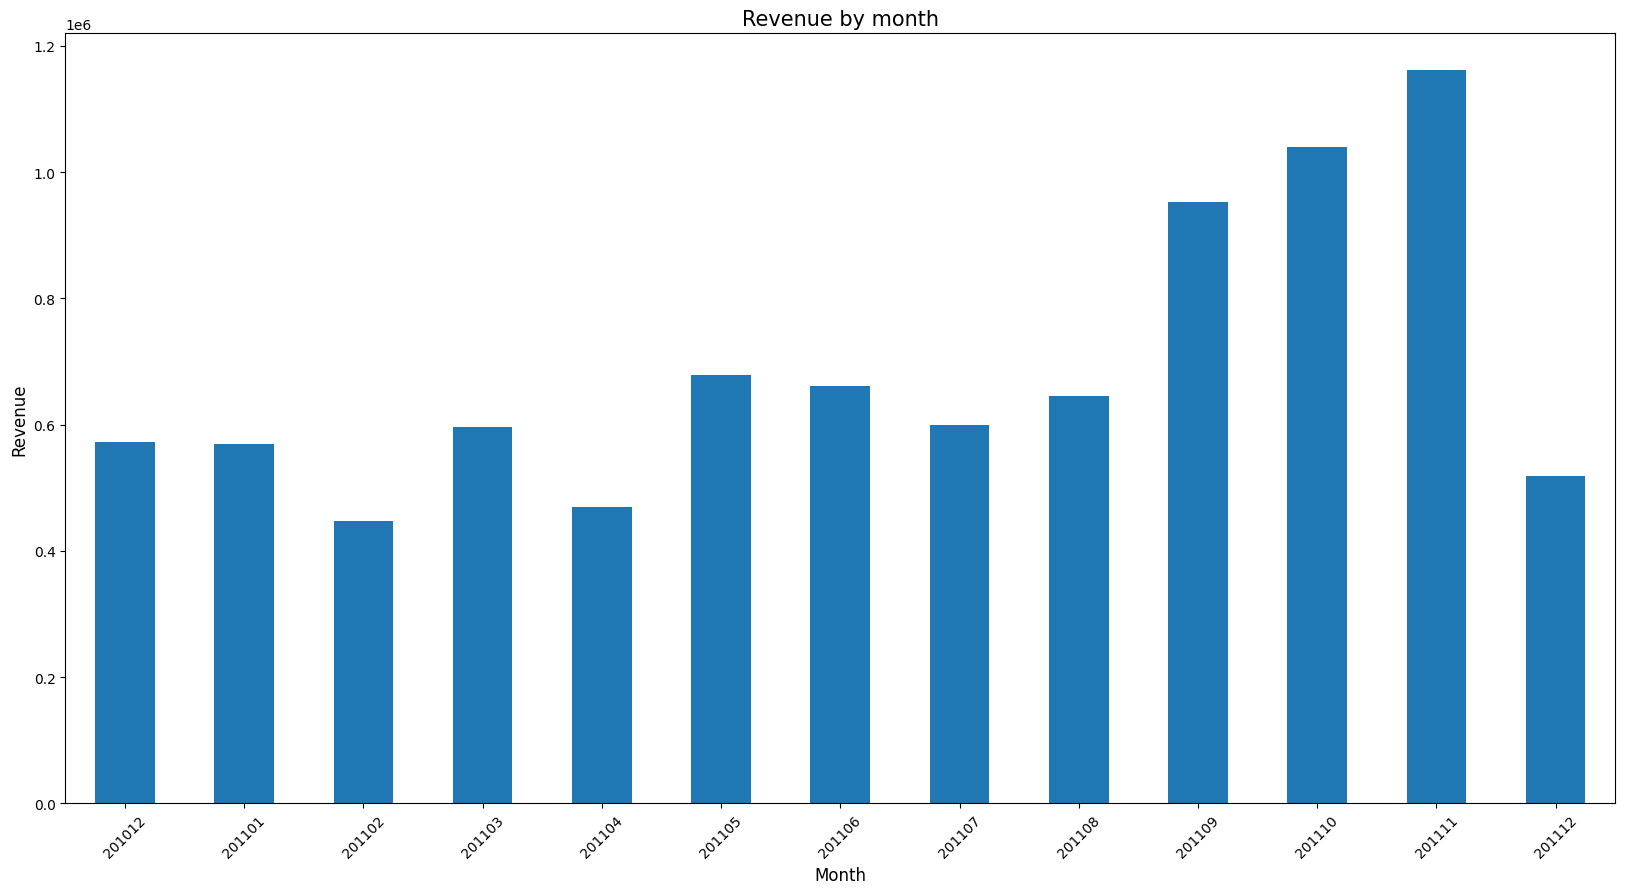

In [ ]:
plot_bar(rev_by_month, 'Month','Revenue','Revenue by month')

In [ ]:
# 요일별 매출 구하기
def extract_dow(date):
    return date.dayofweek

In [ ]:
#rev_by_dow = retail.set_index('InvoiceDate').groupby(extract_month).sum()['CheckoutPrice']
rev_by_dow = retail.set_index('InvoiceDate').groupby(lambda date: date.dayofweek).sum()['CheckoutPrice']

<ipython-input-34-c5ba9e348db8>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rev_by_dow = retail.set_index('InvoiceDate').groupby(lambda date: date.dayofweek).sum()['CheckoutPrice']


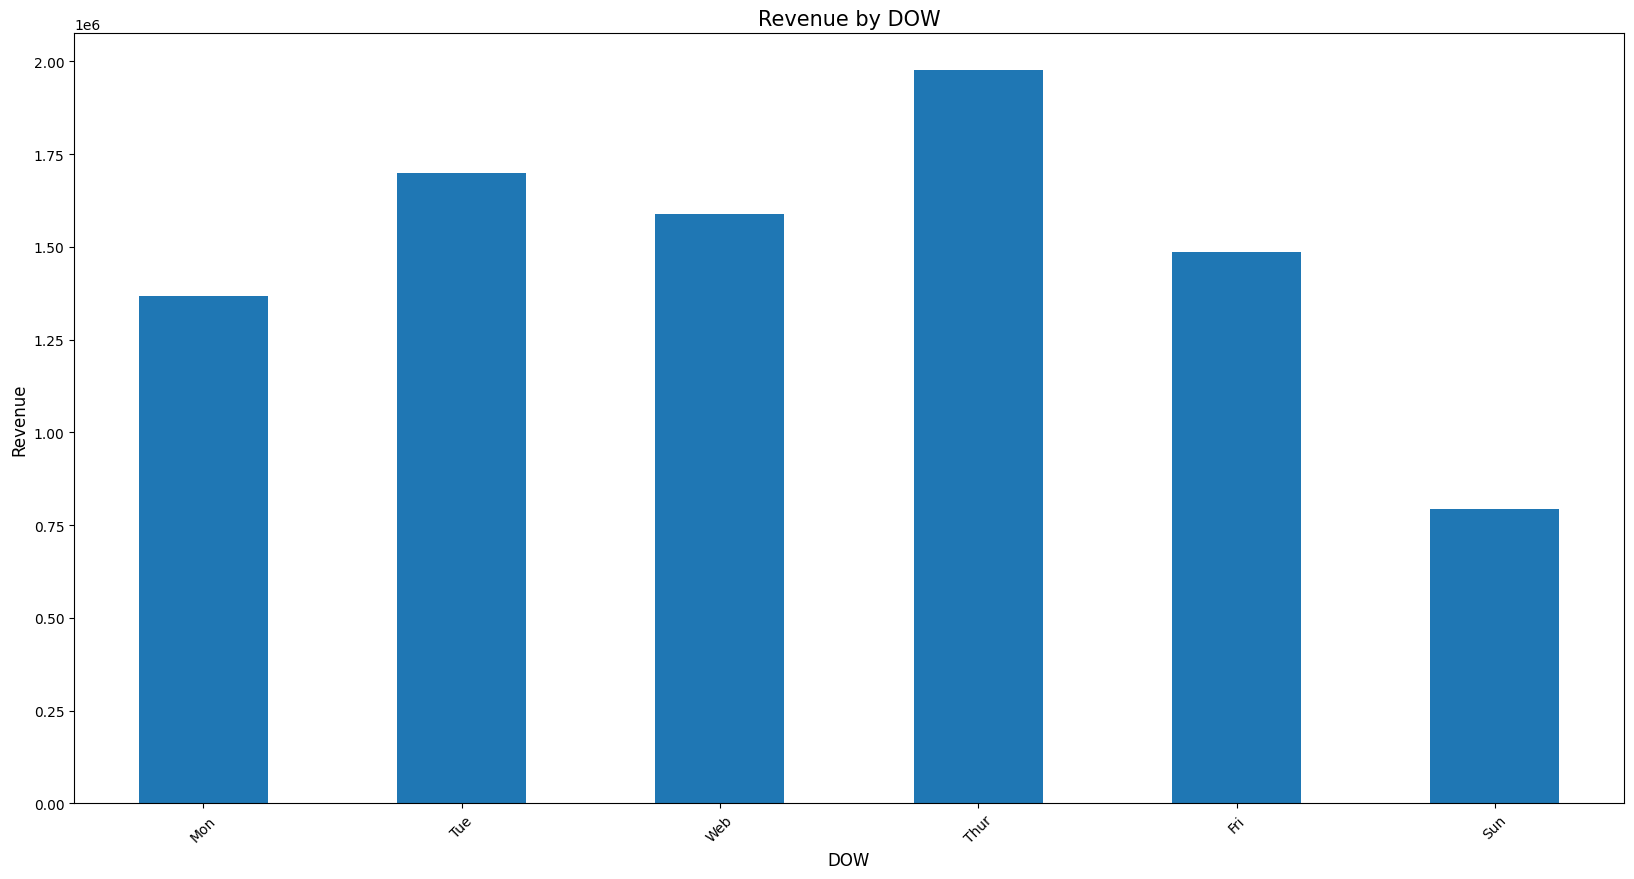

In [ ]:
Day_of_week = np.array(['Mon','Tue','Web','Thur','Fri','Sat','Sun'])
rev_by_dow.index = Day_of_week[rev_by_dow.index]
plot_bar(rev_by_dow,'DOW','Revenue','Revenue by DOW')

In [ ]:
# 시간대별 매출 구하기
rev_by_hour = retail.set_index('InvoiceDate').groupby(lambda date: date.hour).sum()['CheckoutPrice']
rev_by_hour

<ipython-input-36-39161d12b510>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rev_by_hour = retail.set_index('InvoiceDate').groupby(lambda date: date.hour).sum()['CheckoutPrice']


InvoiceDate
6           4.250
7       31059.210
8      282115.630
9      842605.171
10    1261192.571
11    1104558.750
12    1378571.480
13    1173264.750
14     995629.371
15     966191.750
16     468885.800
17     234413.521
18     104954.430
19      49028.460
20      18932.760
Name: CheckoutPrice, dtype: float64

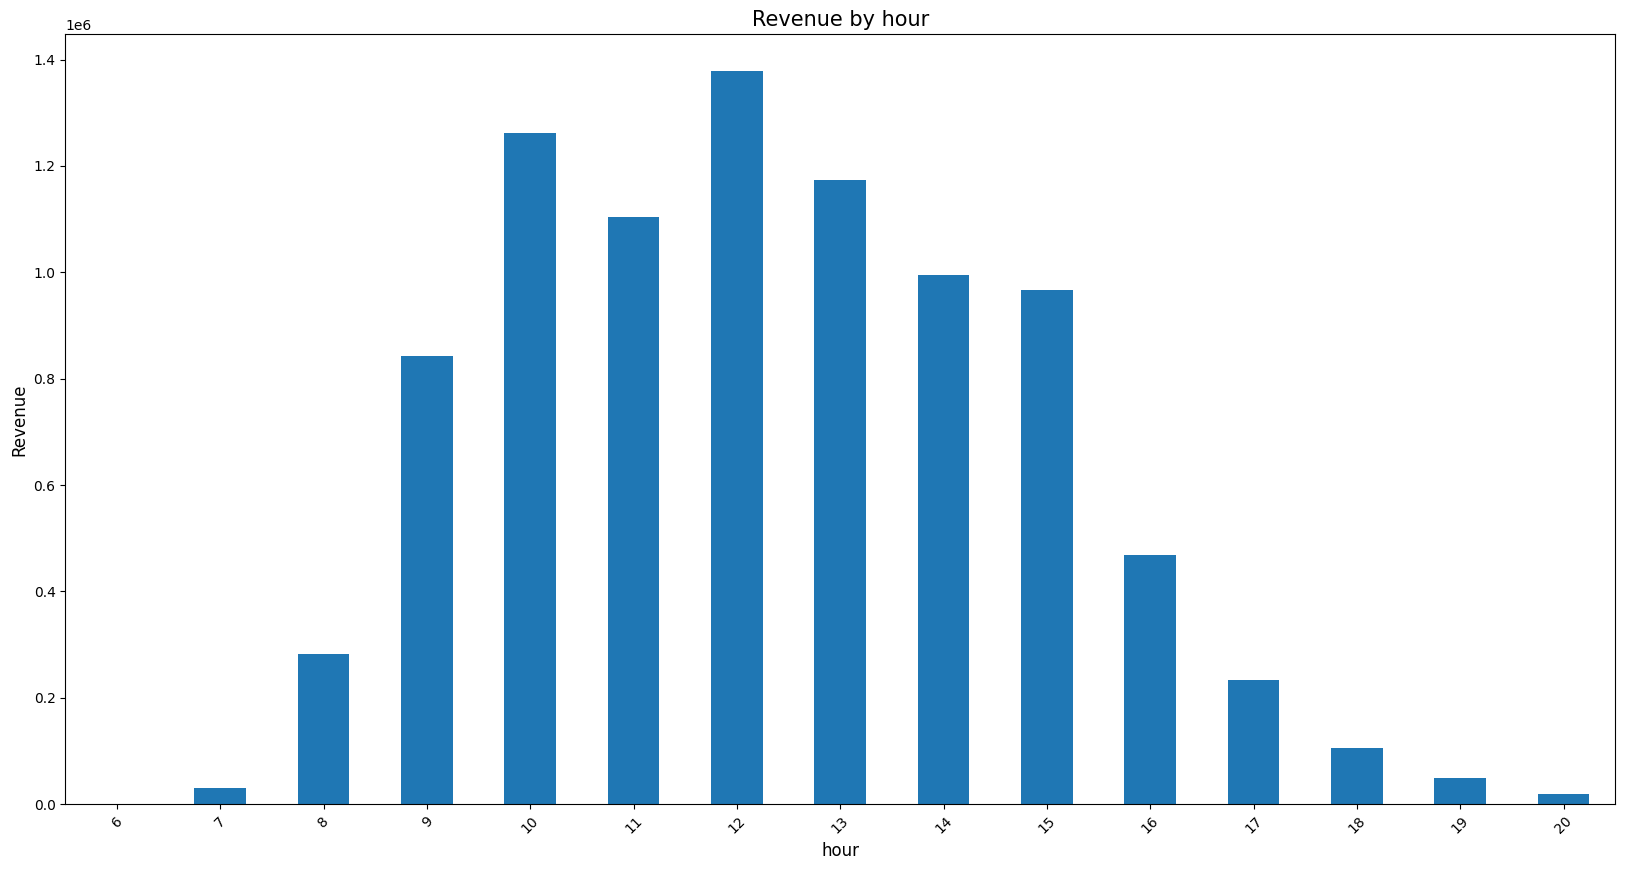

In [ ]:
plot_bar(rev_by_hour, 'hour','Revenue','Revenue by hour')

# 2.매출 데이터로부터 Insight
* 전체 매출의 약 82%가 UK에서 발생
* 11년도에 가장 많은 매출이 발생한 달은 11월
* 매출은 꾸준히 성장하고 있음(12월 데이터는 9일까지만 포함)
* 일주일 중 목요일까지는 성장세를 보이고, 이후로는  하락
* 토요일은 영업하지 않음
* 새벽 6시에 오픈, 오후 9시에 마감이 예상

# 제품별 메트릭스

In [ ]:
# Top 10 판매 제품(Quantity)
# 제품:StockCode
top_selling=retail.groupby('StockCode').sum()['Quantity'].sort_values(ascending=False)[:10]
top_selling

<ipython-input-38-b9331cbc065d>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_selling=retail.groupby('StockCode').sum()['Quantity'].sort_values(ascending=False)[:10]


StockCode
23843     80995
23166     77916
84077     54415
22197     49183
85099B    46181
85123A    36782
84879     35362
21212     33693
23084     27202
22492     26076
Name: Quantity, dtype: int64

In [ ]:
# Top 10 매출 제품(CheckoutPrice)
# 제품:StockCode

top_revenue=retail.groupby('StockCode').sum()['CheckoutPrice'].sort_values(ascending=False)[:10]
top_revenue

<ipython-input-39-34b0213d48d1>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_revenue=retail.groupby('StockCode').sum()['CheckoutPrice'].sort_values(ascending=False)[:10]


StockCode
23843     168469.60
22423     142592.95
85123A    100603.50
85099B     85220.78
23166      81416.73
POST       77803.96
47566      68844.33
84879      56580.34
M          53779.93
23084      51346.20
Name: CheckoutPrice, dtype: float64

# 우수고객

In [ ]:
# 구매 횟수 기준 Top 10 고객

vip=retail.groupby('CustomerID').count()['Quantity'].sort_values(ascending=False).head(10)
vip


CustomerID
17841.0    7847
14911.0    5675
14096.0    5111
12748.0    4595
14606.0    2700
15311.0    2379
14646.0    2076
13089.0    1818
13263.0    1677
14298.0    1637
Name: Quantity, dtype: int64

In [ ]:
# 지불 금액 기준 Top 10 고객
vvip=retail.groupby('CustomerID').sum()['CheckoutPrice'].sort_values(ascending=False).head(10)
vvip

<ipython-input-41-7979683c0965>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  vvip=retail.groupby('CustomerID').sum()['CheckoutPrice'].sort_values(ascending=False).head(10)


CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
12415.0    124914.53
14156.0    117379.63
17511.0     91062.38
16029.0     81024.84
12346.0     77183.60
Name: CheckoutPrice, dtype: float64